# Decision Tree Implementation on Telecom Churn Data

This notebook covers data preprocessing, building a fully grown tree, and applying both pre-pruning and post-pruning techniques to prevent overfitting.

## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz 

In [2]:
df=pd.read_excel('Telco-Customer-Churn_15081388-b1c7-4a07-a581-6b6a494e6346.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- `TotalCharges` is 'object' data type, so it should be converted to 'numeric' data type.

In [4]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Since, there are only 11 missing values (out of a total of 7043 data points) in `TotalCharges`, it can be dropped.

In [6]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

- We can drop `customerID`, because that does not add any value to the prediction. (In fact, it can overfit the model.)

In [8]:
df.drop(['customerID'], axis=1, inplace=True)

#### Creating Separate features and target

In [9]:
le=LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])

- The target variable, `Churn`, is converted from text ('Yes'/'No') to numerical form (1/0) using LabelEncoder.

In [10]:
X=df.drop('Churn', axis=1)
y=df['Churn']

In [11]:
cat_ft=X.select_dtypes(include=['object']).columns
num_ft=X.select_dtypes(include=np.number).columns

#### One-hot encoding categorical features

In [12]:
X=pd.get_dummies(X, columns=cat_ft, drop_first=True)

#### Splitting the data into training and testing sets

- 75% Training Data Set and 25% Test Data Set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Fully Grown Decision Tree

In [14]:
full_tree=DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
dot_data = tree.export_graphviz(full_tree, out_file=None, 
                                filled=True, rounded=True, 
                                special_characters=True)
dot_data = dot_data.replace('digraph Tree {\n', 'digraph Tree {\nsize="15,50";\n', 1)
graph = graphviz.Source(dot_data)
graph

In [16]:
y_pred_full=full_tree.predict(X_test)

In [17]:
print("Accuracy: ", accuracy_score(y_test, y_pred_full))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_full))
print("\nClassification Report:\n", classification_report(y_test, y_pred_full))
print("\nTree Depth: ", full_tree.get_depth())

Accuracy:  0.7155858930602957

Confusion Matrix:
 [[1042  258]
 [ 242  216]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1300
           1       0.46      0.47      0.46       458

    accuracy                           0.72      1758
   macro avg       0.63      0.64      0.64      1758
weighted avg       0.72      0.72      0.72      1758


Tree Depth:  25


- **Observations:**
    - A DecisionTreeClassifier is created with no constraints, allowing it to become a "fully grown" tree.
    - The model achieves an accuracy of approximately 71.56%.
    - The confusion matrix shows the number of correct and incorrect predictions for each class.
    - The classification report provides more detailed metrics like precision, recall, and F1-score.
    - The tree depth of 25 is quite large, which is a strong indicator of overfitting. The model has likely learned the training data too well, including its noise, and may not generalize well to new data.

## Pre-pruned DT

**Regularization:** To combat overfitting, we can apply pre-pruning, which involves setting constraints before the tree is built.

In [18]:
pre_pruned_tree=DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
pre_pruned_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


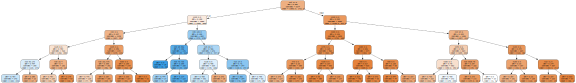

In [19]:
dot_data_pre = tree.export_graphviz(pre_pruned_tree, out_file=None, 
                                filled=True, rounded=True, 
                                special_characters=True)
dot_data_pre = dot_data_pre.replace('digraph Tree {\n', 'digraph Tree {\nsize="8, 8";\n', 1)
graph = graphviz.Source(dot_data_pre)
graph

In [20]:
y_pred_pre=pre_pruned_tree.predict(X_test)

In [21]:
print("Accuracy: ", accuracy_score(y_test, y_pred_pre))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_pre))
print("\nClassification Report:\n", classification_report(y_test, y_pred_pre))
print("\nTree Depth: ", pre_pruned_tree.get_depth())

Accuracy:  0.7804323094425484

Confusion Matrix:
 [[1107  193]
 [ 193  265]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1300
           1       0.58      0.58      0.58       458

    accuracy                           0.78      1758
   macro avg       0.72      0.72      0.72      1758
weighted avg       0.78      0.78      0.78      1758


Tree Depth:  5


- **Observations:**
    - We create a new decision tree, but this time we set max_depth=5 and min_samples_leaf=10. This stops the tree from growing too deep and complex.
    - The accuracy improves to 78.04%, and the tree depth is now only 5. This suggests that the pre-pruned model is more generalized and performs better on the test data.

## Post-pruned DT

**Cost Complexity Pruning:** Post-pruning involves growing a full tree first and then pruning it back. We use Cost Complexity Pruning to find the optimal `ccp_alpha` (complexity parameter).

### Finding the Best Alpha

In [22]:
path=full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities=path.ccp_alphas, path.impurities

In [23]:
clfs=[]
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [24]:
clfs=clfs[:-1]
ccp_alphas=ccp_alphas[:-1]

In [25]:
train_scores=[clf.score(X_train, y_train) for clf in clfs]
test_scores=[clf.score(X_test, y_test) for clf in clfs]

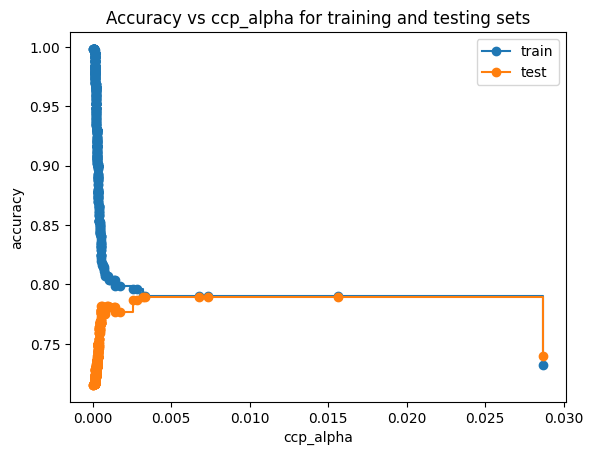

In [26]:
plt.figure()
plt.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs ccp_alpha for training and testing sets")
plt.legend()
plt.show()

**Output Plot:**
- The plot shows that as alpha increases, the accuracy on the training set decreases because the tree is becoming simpler. The test set accuracy increases to a peak and then starts to decrease as the tree becomes too simple (underfitting).

We calculate the `ccp_alpha` values that would be considered for pruning the fully grown tree. We then train a separate tree for each of these alpha values. The goal is to find the alpha that maximizes the test accuracy.

In [27]:
best_alpha=ccp_alphas[np.argmax(test_scores)]
print("Best ccp_alpha: ", best_alpha)

Best ccp_alpha:  0.0032350420542706718


In [28]:
post_pruned_tree=DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
post_pruned_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


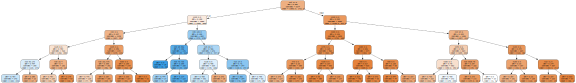

In [29]:
dot_data_pre = tree.export_graphviz(pre_pruned_tree, out_file=None, 
                                filled=True, rounded=True, 
                                special_characters=True)
dot_data_pre = dot_data_pre.replace('digraph Tree {\n', 'digraph Tree {\nsize="8, 8";\n', 1)
graph = graphviz.Source(dot_data_pre)
graph

In [30]:
y_pred_post=post_pruned_tree.predict(X_test)

In [31]:
print("Accuracy: ", accuracy_score(y_test, y_pred_post))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_post))
print("\nClassification Report:\n", classification_report(y_test, y_pred_post))
print("\nTree Depth: ", post_pruned_tree.get_depth())

Accuracy:  0.7895335608646189

Confusion Matrix:
 [[1206   94]
 [ 276  182]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87      1300
           1       0.66      0.40      0.50       458

    accuracy                           0.79      1758
   macro avg       0.74      0.66      0.68      1758
weighted avg       0.77      0.79      0.77      1758


Tree Depth:  4


**Observations:**
- Best `ccp_alpha` obtained is 0.0032350420542706718.
- The final accuracy of the post-pruned tree is 79.95%, which is a slight improvement over the pre-pruned tree. The tree depth is 4.